In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from scipy.io import arff
import numpy as np
import pandas as pd

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [25]:
data = arff.loadarff('data/higgs.arff')
df = pd.DataFrame(data[0])

df.head()

,class,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b-tag,...,jet4eta,jet4phi,jet4b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,b'1',0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,b'1',0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,b'0',1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,b'1',1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,b'0',1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


In [27]:
df.dropna(inplace=True)
labels = df['class']
labels.replace(b'1', 1, inplace=True)
labels.replace(b'0', 0, inplace=True)
features = df.iloc[:, 1:]
print(features.shape)

(98049, 28)


In [28]:
print(f'positive signal rate: {labels[labels==1].sum()/len(labels):.2f}')
print(f'background signal rate: {len(labels[labels==0])/len(labels):.2f}')

positive signal rate: 0.53
background signal rate: 0.47


In [31]:
feature_names = features.columns
forest = RandomForestClassifier(random_state=0, n_jobs=-1)
forest.fit(features.values, labels.values)

RandomForestClassifier(random_state=0)

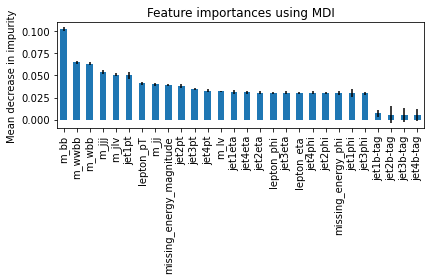

In [36]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(forest.feature_importances_, index=feature_names)
forest_importances.sort_values(inplace=True, ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

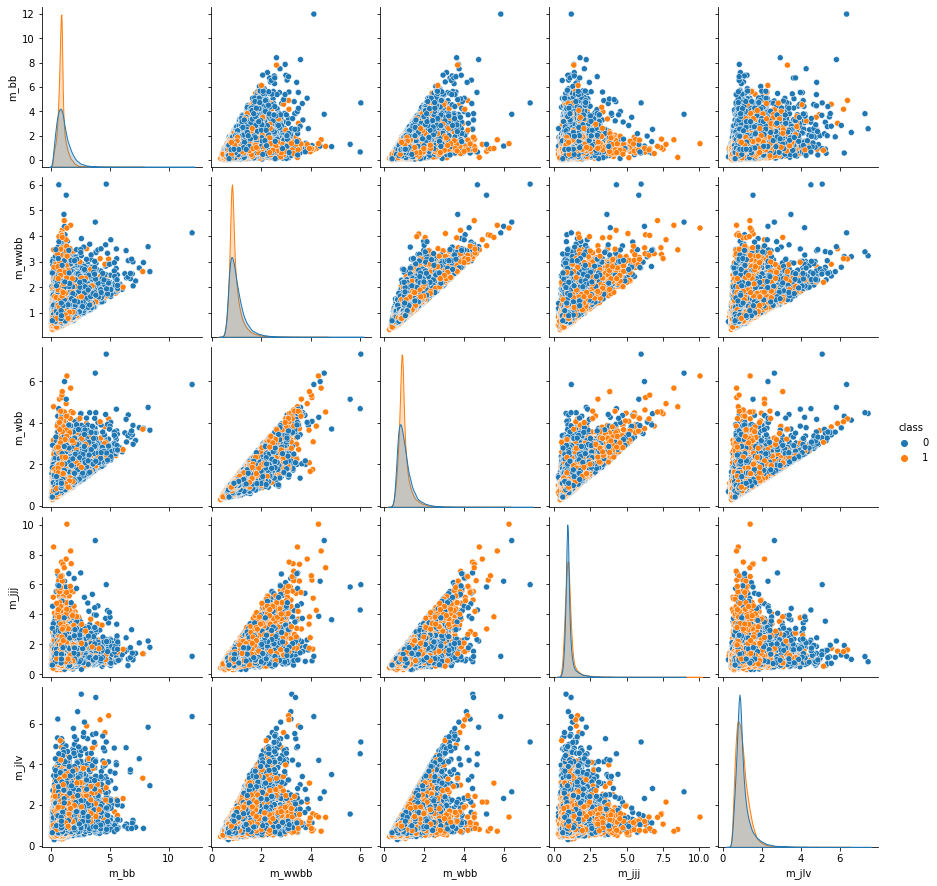

In [48]:
top5 = list(forest_importances[:5].index)
sns.pairplot(df[top5+['class']], hue="class")